# Call Wikipedia API to retrieve the page:

In [1]:
import requests

page_title = "Natural language processing"

# make an API call to get the page content in palin text
response = requests.get(
    "https://en.wikipedia.org/w/api.php",
    params={
        "action": "query",
        "format": "json",
        "titles": page_title,
        "prop": "extracts",
        # "exintro": True,
        "explaintext": True,
    }
).json()

# extract the page text in a string (page_text)
response = list(response["query"]["pages"].values())[0]
page_text = response["extract"].lower()
page_id = response["pageid"]
page_text

'natural language processing (nlp) is an interdisciplinary subfield of linguistics and computer science. it is primarily concerned  with processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. the goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. the technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\nchallenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.\n\n\n== history ==\n\nnatural language processing has its roots in the 1950s. already in 1950, alan turing published an article titled "computing machinery and intelligence" which proposed what is now called the t

# Extract keywords, bigrams and trigrams:

In [2]:
# define a list of stop words
stop_words = ["'ll", "'tis", "'twas", "'ve", "10", "39", "a", "a's", "able", "ableabout", "about", "above", "abroad", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "adopted", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ago", "ah", "ahead", "ai", "ain't", "aint", "al", "all", "allow", "allows", "almost", "alone", "along", "alongside", "already", "also", "although", "always", "am", "amid", "amidst", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "aq", "ar", "are", "area", "areas", "aren", "aren't", "arent", "arise", "around", "arpa", "as", "aside", "ask", "asked", "asking", "asks", "associated", "at", "au", "auth", "available", "aw", "away", "awfully", "az", "b", "ba", "back", "backed", "backing", "backs", "backward", "backwards", "bb", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "began", "begin", "beginning", "beginnings", "begins", "behind", "being", "beings", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bf", "bg", "bh", "bi", "big", "bill", "billion", "biol", "bj", "bm", "bn", "bo", "both", "bottom", "br", "brief", "briefly", "bs", "bt", "but", "buy", "bv", "bw", "by", "bz", "c", "c'mon", "c's", "ca", "call", "came", "can", "can't", "cannot", "cant", "caption", "case", "cases", "cause", "causes", "cc", "cd", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "ck", "cl", "clear", "clearly", "click", "cm", "cmon", "cn", "co", "co.", "com", "come", "comes", "computer", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "copy", "corresponding", "could", "could've", "couldn", "couldn't", "couldnt", "course", "cr", "cry", "cs", "cu", "currently", "cv", "cx", "cy", "cz", "d", "dare", "daren't", "darent", "date", "de", "dear", "definitely", "describe", "described", "despite", "detail", "did", "didn", "didn't", "didnt", "differ", "different", "differently", "directly", "dj", "dk", "dm", "do", "does", "doesn", "doesn't", "doesnt", "doing", "don", "don't", "done", "dont", "doubtful", "down", "downed", "downing", "downs", "downwards", "due", "during", "dz", "e", "each", "early", "ec", "ed", "edu", "ee", "effect", "eg", "eh", "eight", "eighty", "either", "eleven", "else", "elsewhere", "empty", "end", "ended", "ending", "ends", "enough", "entirely", "er", "es", "especially", "et", "et-al", "etc", "even", "evenly", "ever", "evermore", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "f", "face", "faces", "fact", "facts", "fairly", "far", "farther", "felt", "few", "fewer", "ff", "fi", "fifteen", "fifth", "fifty", "fify", "fill", "find", "finds", "fire", "first", "five", "fix", "fj", "fk", "fm", "fo", "followed", "following", "follows", "for", "forever", "former", "formerly", "forth", "forty", "forward", "found", "four", "fr", "free", "from", "front", "full", "fully", "further", "furthered", "furthering", "furthermore", "furthers", "fx", "g", "ga", "gave", "gb", "gd", "ge", "general", "generally", "get", "gets", "getting", "gf", "gg", "gh", "gi", "give", "given", "gives", "giving", "gl", "gm", "gmt", "gn", "go", "goes", "going", "gone", "good", "goods", "got", "gotten", "gov", "gp", "gq", "gr", "great", "greater", "greatest", "greetings", "group", "grouped", "grouping", "groups", "gs", "gt", "gu", "gw", "gy", "h", "had", "hadn't", "hadnt", "half", "happens", "hardly", "has", "hasn", "hasn't", "hasnt", "have", "haven", "haven't", "havent", "having", "he", "he'd", "he'll", "he's", "hed", "hell", "hello", "help", "hence", "her", "here", "here's", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "herse”", "hes", "hi", "hid", "high", "higher", "highest", "him", "himself", "himse”", "his", "hither", "hk", "hm", "hn", "home", "homepage", "hopefully", "how", "how'd", "how'll", "how's", "howbeit", "however", "hr", "ht", "htm", "html", "http", "hu", "hundred", "i", "i'd", "i'll", "i'm", "i've", "i.e.", "id", "ie", "if", "ignored", "ii", "il", "ill", "im", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "inc.", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "inside", "insofar", "instead", "int", "interest", "interested", "interesting", "interests", "into", "invention", "inward", "io", "iq", "ir", "is", "isn", "isn't", "isnt", "it", "it'd", "it'll", "it's", "itd", "itll", "its", "itself", "itse”", "ive", "j", "je", "jm", "jo", "join", "jp", "just", "k", "ke", "keep", "keeps", "kept", "keys", "kg", "kh", "ki", "kind", "km", "kn", "knew", "know", "known", "knows", "kp", "kr", "kw", "ky", "kz", "l", "la", "large", "largely", "last", "lately", "later", "latest", "latter", "latterly", "lb", "lc", "least", "length", "less", "lest", "let", "let's", "lets", "li", "like", "liked", "likely", "likewise", "line", "little", "lk", "ll", "long", "longer", "longest", "look", "looking", "looks", "low", "lower", "lr", "ls", "lt", "ltd", "lu", "lv", "ly", "m", "ma", "made", "mainly", "make", "makes", "making", "man", "many", "may", "maybe", "mayn't", "maynt", "mc", "md", "me", "mean", "means", "meantime", "meanwhile", "member", "members", "men", "merely", "mg", "mh", "microsoft", "might", "might've", "mightn't", "mightnt", "mil", "mill", "million", "mine", "minus", "miss", "mk", "ml", "mm", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mp", "mq", "mr", "mrs", "ms", "msie", "mt", "mu", "much", "mug", "must", "must've", "mustn't", "mustnt", "mv", "mw", "mx", "my", "myself", "myse”", "mz", "n", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needed", "needing", "needn't", "neednt", "needs", "neither", "net", "netscape", "never", "neverf", "neverless", "nevertheless", "new", "newer", "newest", "next", "nf", "ng", "ni", "nine", "ninety", "nl", "no", "no-one", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "notwithstanding", "novel", "now", "nowhere", "np", "nr", "nu", "null", "number", "numbers", "nz", "o", "obtain", "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "older", "oldest", "om", "omitted", "on", "once", "one", "one's", "ones", "only", "onto", "open", "opened", "opening", "opens", "opposite", "or", "ord", "order", "ordered", "ordering", "orders", "org", "other", "others", "otherwise", "ought", "oughtn't", "oughtnt", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing", "own", "p", "pa", "page", "pages", "part", "parted", "particular", "particularly", "parting", "parts", "past", "pe", "per", "perhaps", "pf", "pg", "ph", "pk", "pl", "place", "placed", "places", "please", "plus", "pm", "pmid", "pn", "point", "pointed", "pointing", "points", "poorly", "possible", "possibly", "potentially", "pp", "pr", "predominantly", "present", "presented", "presenting", "presents", "presumably", "previously", "primarily", "probably", "problem", "problems", "promptly", "proud", "provided", "provides", "pt", "put", "puts", "pw", "py", "q", "qa", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "reserved", "respectively", "resulted", "resulting", "results", "right", "ring", "ro", "room", "rooms", "round", "ru", "run", "rw", "s", "sa", "said", "same", "saw", "say", "saying", "says", "sb", "sc", "sd", "se", "sec", "second", "secondly", "seconds", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "sees", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "seventy", "several", "sg", "sh", "shall", "shan't", "shant", "'s", "'d", "'ll", "'ve", "'re", "she", "she'd", "she'll", "she's", "shed", "shell", "shes", "should", "should've", "shouldn", "shouldn't", "shouldnt", "show", "showed", "showing", "shown", "showns", "shows", "si", "side", "sides", "significant", "significantly", "similar", "similarly", "since", "sincere", "site", "six", "sixty", "sj", "sk", "sl", "slightly", "sm", "small", "smaller", "smallest", "sn", "so", "some", "somebody", "someday", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "sr", "st", "state", "states", "still", "stop", "strongly", "su", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sv", "sy", "system", "sz", "t", "t's", "take", "taken", "taking", "tc", "td", "tell", "ten", "tends", "test", "text", "tf", "tg", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "that's", "that've", "thatll", "thats", "thatve", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "there'd", "there'll", "there're", "there's", "there've", "thereafter", "thereby", "thered", "therefore", "therein", "therell", "thereof", "therere", "theres", "thereto", "thereupon", "thereve", "these", "they", "they'd", "they'll", "they're", "they've", "theyd", "theyll", "theyre", "theyve", "thick", "thin", "thing", "things", "think", "thinks", "third", "thirty", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thought", "thoughts", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "til", "till", "tip", "tis", "tj", "tk", "tm", "tn", "to", "today", "together", "too", "took", "top", "toward", "towards", "tp", "tr", "tried", "tries", "trillion", "truly", "try", "trying", "ts", "tt", "turn", "turned", "turning", "turns", "tv", "tw", "twas", "twelve", "twenty", "twice", "two", "tz", "u", "ua", "ug", "uk", "um", "un", "under", "underneath", "undoing", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "upwards", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "uucp", "uy", "uz", "v", "va", "value", "various", "vc", "ve", "versus", "very", "vg", "vi", "via", "viz", "vn", "vol", "vols", "vs", "vu", "w", "want", "wanted", "wanting", "wants", "was", "wasn", "wasn't", "wasnt", "way", "ways", "we", "we'd", "we'll", "we're", "we've", "web", "webpage", "website", "wed", "welcome", "well", "wells", "went", "were", "weren", "weren't", "werent", "weve", "wf", "what", "what'd", "what'll", "what's", "what've", "whatever", "whatll", "whats", "whatve", "when", "when'd", "when'll", "when's", "whence", "whenever", "where", "where'd", "where'll", "where's", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "whichever", "while", "whilst", "whim", "whither", "who", "who'd", "who'll", "who's", "whod", "whoever", "whole", "wholl", "whom", "whomever", "whos", "whose", "why", "why'd", "why'll", "why's", "widely", "width", "will", "willing", "wish", "with", "within", "without", "won", "won't", "wonder", "wont", "words", "work", "worked", "working", "works", "world", "would", "would've", "wouldn", "'ve", "'d", "'t", "wouldn't", "wouldnt", "https", "http", "n't", "ws", "www", "x", "y", "ye", "year", "years", "yes", "yet", "you", "you'd", "you'll", "you're", "you've", "youd", "youll", "young", "younger", "youngest", "your", "youre", "yours", "yourself", "yourselves", "youve", "yt", "yu", "z", "za", "zero", "zm", "zr", "``", "`", "```", ";", ",", ".", ":", "/", "-", "–", "—", "\"", "'", "?", "!", "(", ")", "''", "'m", "==", "===", "====", "%", "[", "]", "‘"]

In [3]:
import nltk
import collections as clcn
import pandas as pd
import numpy as np

n_gram_count = 20

@np.vectorize
def is_hotword(word: str) -> bool:
    """This function returns True if the input string (word) is neither a number/punctuation nor a stop word/punctuation mark and return False otherwise"""
    if not word.isalpha():
        return False
    if word in stop_words:
        return False
    return True

# seperate words and punctuations in the text
page_words = nltk.tokenize.wordpunct_tokenize(page_text)

# take the keywords from the list of words and puntuations
page_keywords = pd.DataFrame(page_words)[is_hotword(page_words)].values.flatten().tolist()
# page_keywords = [word for word in page_words if is_hotword(word)]

# lemmatize keywords to avoid counting single and plural forms as to different occurences of a word
keywords_lemmatized = np.vectorize(nltk.stem.wordnet.WordNetLemmatizer().lemmatize)(page_keywords).tolist()
# keywords_lemmatized = [nltk.stem.wordnet.WordNetLemmatizer().lemmatize(word) for word in page_keywords]

# count number of occurences of each keyword and seperate the "n_gram_count" most occured ones
keywords_count = dict(clcn.Counter(keywords_lemmatized).most_common(n_gram_count))
print(keywords_count)

# form, count bigrams and seperate the "n_gram_count" most occured ones
bigrams = [" ".join(pair) for pair in nltk.bigrams(keywords_lemmatized)]
bigrams_count = dict(clcn.Counter(bigrams).most_common(n_gram_count))
print(bigrams_count)

# form, count trigrams and seperate the "n_gram_count" most occured ones
trigrams = [" ".join(pair) for pair in nltk.trigrams(keywords_lemmatized)]
trigrams_count = dict(clcn.Counter(trigrams).most_common(n_gram_count))
print(trigrams_count)

{'language': 67, 'natural': 33, 'nlp': 32, 'task': 28, 'sentence': 23, 'speech': 21, 'rule': 20, 'approach': 19, 'based': 18, 'machine': 18, 'semantic': 17, 'statistical': 16, 'parsing': 16, 'semantics': 16, 'processing': 15, 'system': 15, 'word': 15, 'cognitive': 15, 'neural': 14, 'grammar': 13}
{'natural language': 32, 'language processing': 13, 'rule based': 11, 'neural network': 10, 'machine translation': 9, 'semantic role': 9, 'machine learning': 7, 'named entity': 7, 'language understanding': 6, 'role labelling': 6, 'statistical neural': 5, 'speech recognition': 5, 'nlp task': 5, 'language model': 5, 'based approach': 4, 'statistical approach': 4, 'learning approach': 3, 'language generation': 3, 'artificial intelligence': 3, 'symbolic nlp': 3}
{'natural language processing': 11, 'natural language understanding': 6, 'semantic role labelling': 6, 'statistical neural network': 5, 'rule based approach': 4, 'machine learning approach': 3, 'natural language generation': 3, 'rule based

# Plot keyword/bigram/trigram occurrence frequencies

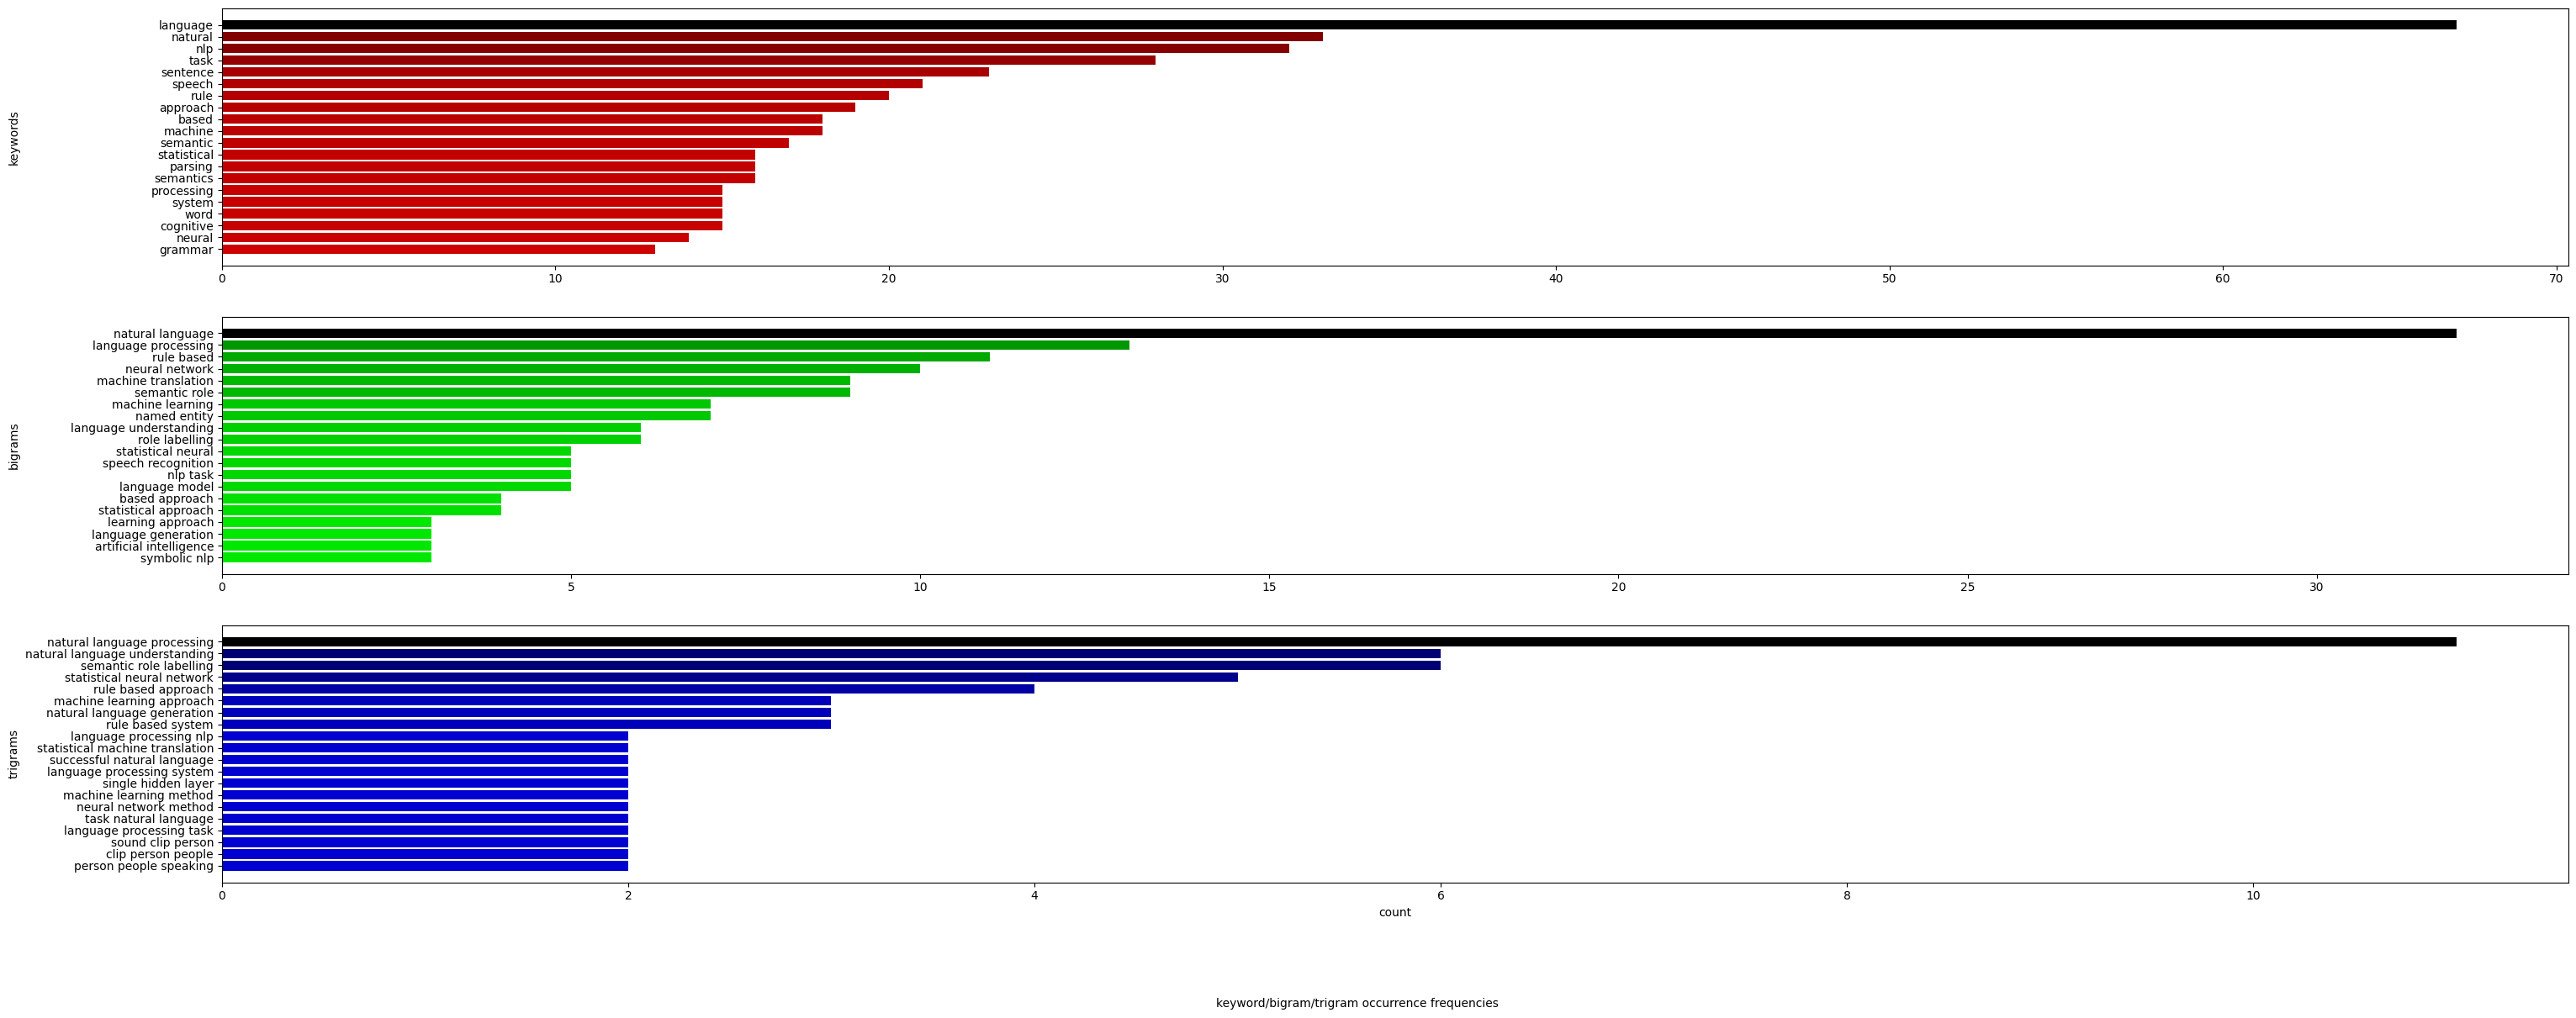

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

@np.vectorize
def color(intensity: float, color: str = "B") -> str:
    """This function defines a color code based on the intesity and the color. Latter can be either "R", "G" or "B" (for red, green and blue). the intensities above 1 are interpreted as full intensity and intensities beow 0 are interpreted as black"""
    if intensity < 0:
        return "#000000"
    if intensity > 0.994140625:
        match color.upper():
            case "R":
                return "#ff0000"
            case "G":
                return "#00ff00"
            case "B":
                return "#0000ff"
    if intensity < 0.060546875:
        match color.upper():
            case "R":
                return f"#0{hex(round(256*intensity))[2:]}0000"
            case "G":
                return f"#000{hex(round(256*intensity))[2:]}00"
            case "B":
                return f"#00000{hex(round(256*intensity))[2:]}"
    else:
        match color.upper():
            case "R":
                return f"#{hex(round(256*intensity))[2:]}0000"
            case "G":
                return f"#00{hex(round(256*intensity))[2:]}00"
            case "B":
                return f"#0000{hex(round(256*intensity))[2:]}"

# define a plot with 3 subplot, each in a row
plt.rcParams["savefig.format"]="svg"
fig, axes = plt.subplots(nrows=3, ncols=1, figsize =(36, 13.5))

# prepare and plot keyword subplot
y_axis = np.arange(n_gram_count)
y_axis_labels_keywords = list(keywords_count.keys())
if "°" in y_axis_labels_keywords:
    y_axis_labels_keywords[y_axis_labels_keywords.index("°")] = "° (degree)"
x_axis_labels_keywords = np.array(list(keywords_count.values()))
colors = color(1-x_axis_labels_keywords/np.max(x_axis_labels_keywords), "R")

# axes[1].set_xlabel("count")
axes[0].set_ylabel("keywords")
axes[0].set_yticks(y_axis, labels=y_axis_labels_keywords)
axes[0].invert_yaxis()
axes[0].barh(y_axis, width=x_axis_labels_keywords, color=colors)

# prepare and plot bigram subplot
y_axis_labels_bigrams = list(bigrams_count.keys())
x_axis_labels_bigrams = np.array(list(bigrams_count.values()))
colors = color(1-x_axis_labels_bigrams/np.max(x_axis_labels_bigrams), "G")

# axes[1].set_xlabel("count")
axes[1].set_ylabel("bigrams")
axes[1].set_yticks(y_axis, labels=y_axis_labels_bigrams)
axes[1].invert_yaxis()
axes[1].barh(y_axis, width=x_axis_labels_bigrams, color=colors, animated=True)

# prepare and plot trigram subplot
y_axis_labels_trigrams = list(trigrams_count.keys())
x_axis_labels_trigrams = np.array(list(trigrams_count.values()))
colors = color(1-x_axis_labels_trigrams/np.max(x_axis_labels_trigrams), "B")

axes[2].set_xlabel("count")
axes[2].set_ylabel("trigrams")
axes[2].set_yticks(y_axis, labels=y_axis_labels_trigrams)
axes[2].invert_yaxis()
axes[2].barh(y_axis, width=x_axis_labels_trigrams, color=colors, animated=True)

fig.text(x=0.5, y=0, s="keyword/bigram/trigram occurrence frequencies", ha='center')
fig.align_labels()

plt.savefig("./figure.svg")

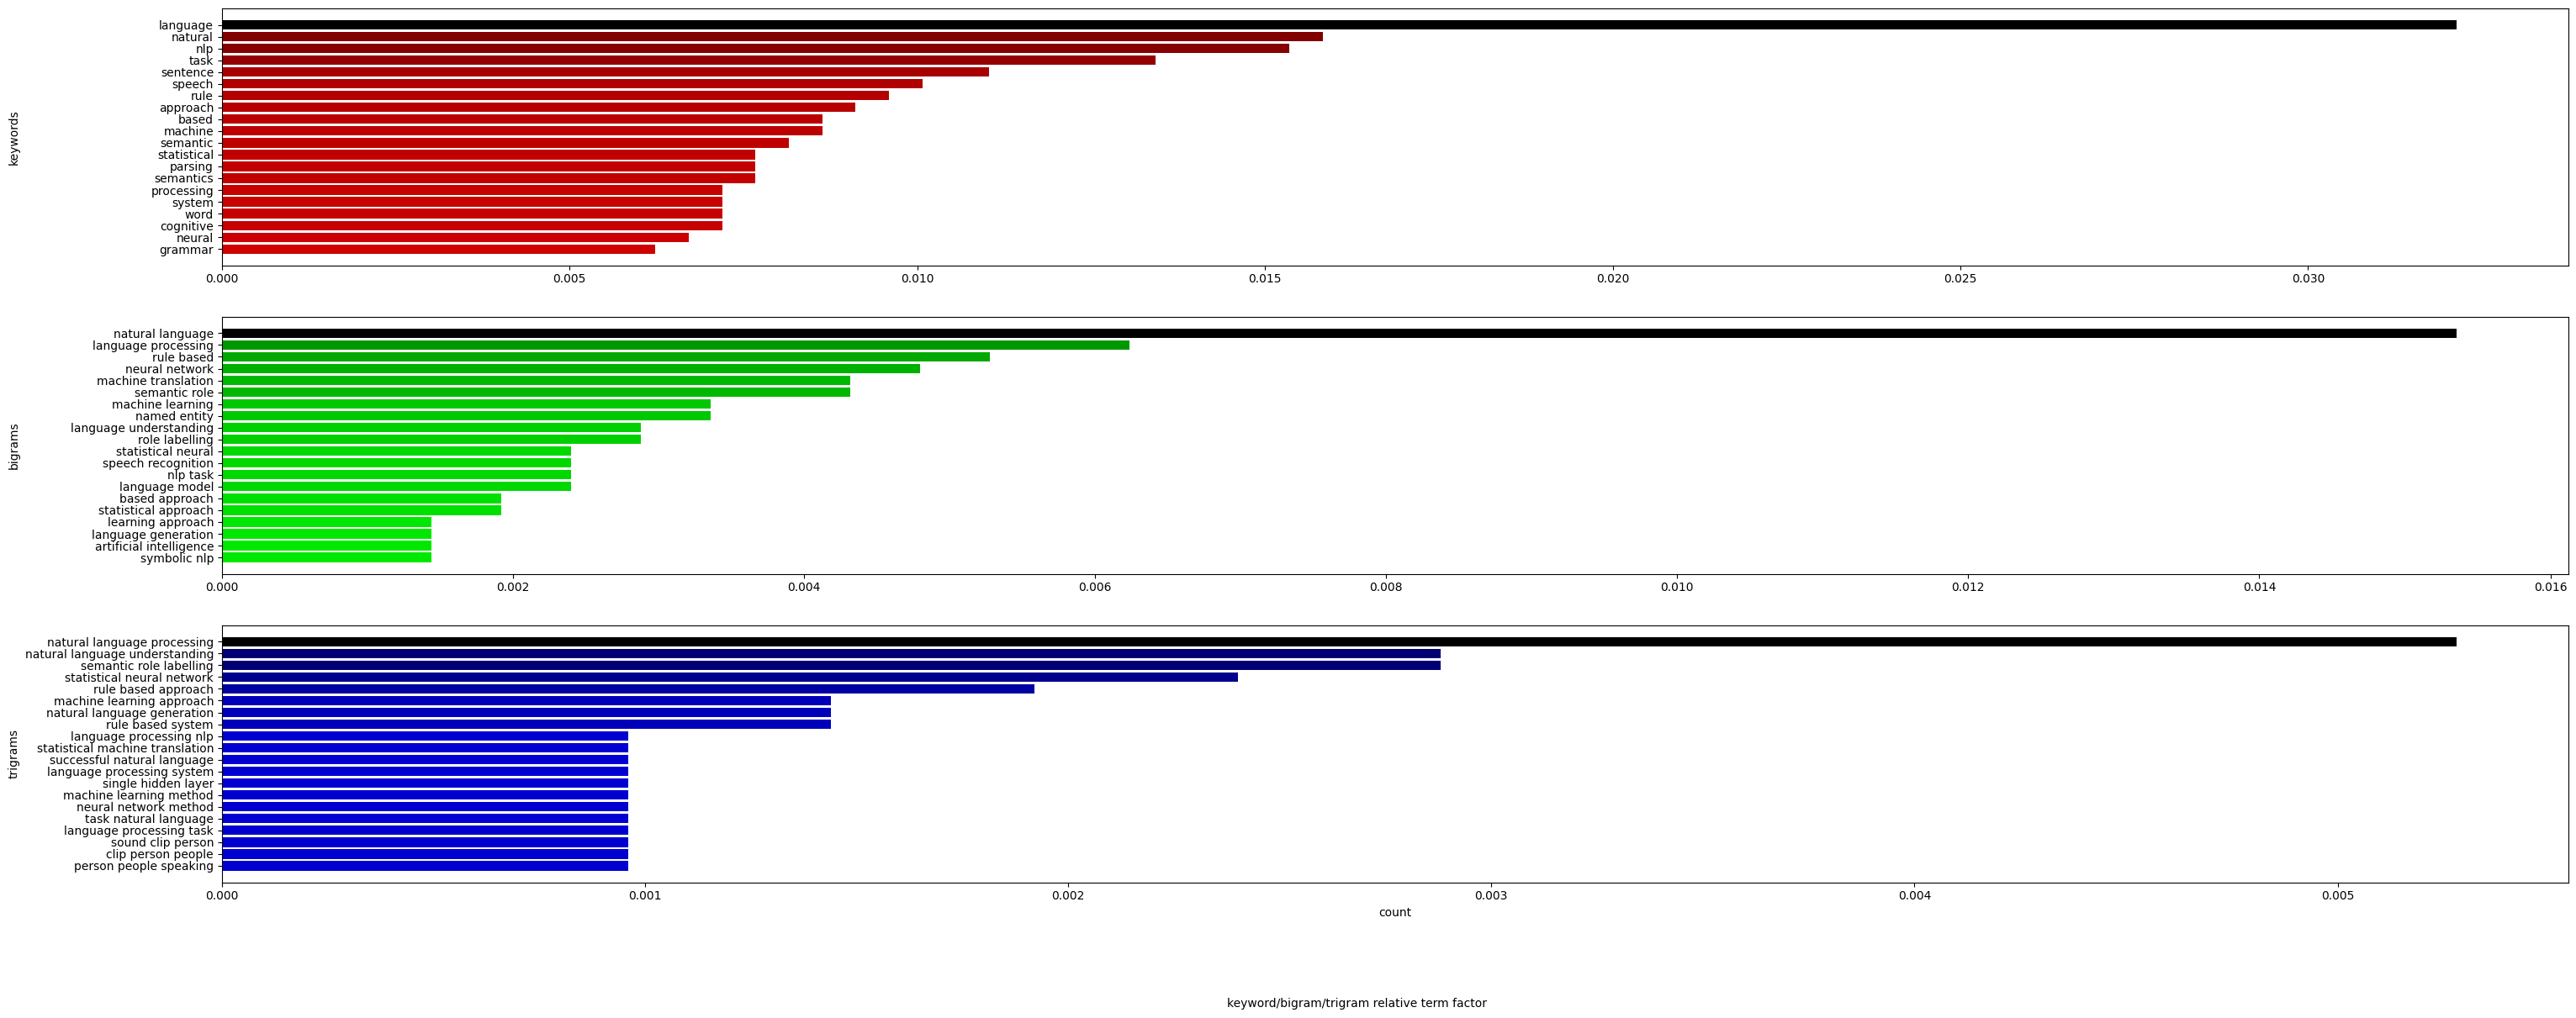

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize =(36, 13.5))

# prepare and plot keyword subplot
x_axis_labels_keywords = np.array(list(keywords_count.values()))/clcn.Counter(keywords_lemmatized).total()
colors = color(1-x_axis_labels_keywords/np.max(x_axis_labels_keywords), "R")

# axes[1].set_xlabel("count")
axes[0].set_ylabel("keywords")
axes[0].set_yticks(y_axis, labels=y_axis_labels_keywords)
axes[0].invert_yaxis()
axes[0].barh(y_axis, width=x_axis_labels_keywords, color=colors)

# prepare and plot bigram subplot
x_axis_labels_bigrams = np.array(list(bigrams_count.values()))/clcn.Counter(bigrams).total()
colors = color(1-x_axis_labels_bigrams/np.max(x_axis_labels_bigrams), "G")

# axes[1].set_xlabel("count")
axes[1].set_ylabel("bigrams")
axes[1].set_yticks(y_axis, labels=y_axis_labels_bigrams)
axes[1].invert_yaxis()
axes[1].barh(y_axis, width=x_axis_labels_bigrams, color=colors, animated=True)

# prepare and plot trigram subplot
x_axis_labels_trigrams = np.array(list(trigrams_count.values()))/clcn.Counter(trigrams).total()
colors = color(1-x_axis_labels_trigrams/np.max(x_axis_labels_trigrams), "B")

axes[2].set_xlabel("count")
axes[2].set_ylabel("trigrams")
axes[2].set_yticks(y_axis, labels=y_axis_labels_trigrams)
axes[2].invert_yaxis()
axes[2].barh(y_axis, width=x_axis_labels_trigrams, color=colors, animated=True)

fig.text(x=0.5, y=0, s="keyword/bigram/trigram relative term factor", ha='center')
fig.align_labels()

plt.savefig("./figure2.svg")

# Call Wikipedia API to retrieve a brief description of the page:

In [6]:
import requests
response = requests.get(
    "https://en.wikipedia.org/w/api.php",
    params={
        "action": "query",
        "format": "json",
        "titles": page_title,
        "prop": "description"
    }
).json()
page = next(iter(response["query"]["pages"].values()))
page["description"]

'Field of linguistics and computer science'

# Conclusion:

I used the stop-word list provided to analyze the content of an English Wikipedia page of "Natural language processing". Analyzing the content of the page, I found that the most common words were "language", "natural", "processing", "nlp", "task", "machine", "learning", "speech" and "system." The most common word pairs were "natural language", "language processing", "machine learning", "machine translation", "semantic role", "neural network", "speech recognition" and "language understanding".

This indicates that the page is mainly about the use of computer algorithms and statistical models to analyze and understand natural language, as well as the various applications of artificial intelligence and machine learning such neural networks in processing and understanding of natural language in both text and speech form.